In [24]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error
import time 


# on commance par analyse et renomer les colonnnes de data set 

In [25]:
data = pd.read_excel("E:\\Reseau_N_s2\\data\\ENB2012_data.xlsx")
data


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Normalisation des données
une normalisation min-max du "Surface Area" ,Wall Area ,Roof Area <br> """"""""""
​Cela permet d'assurer une contribution homogène de chaque caractéristique au processus d'apprentissage."""""""""

In [26]:

# data['Surface Area'] = (data['Surface Area'] - data['Surface Area'].min()) / (data['Surface Area'].max() - data['Surface Area'].min())
# data['Wall Area'] = (data['Wall Area'] - data['Wall Area'].min()) / (data['Wall Area'].max() - data['Wall Area'].min())
# data['Roof Area'] = (data['Roof Area'] - data['Roof Area'].min()) / (data['Roof Area'].max() - data['Roof Area'].min())

# class Backpropagation
Cette classe regroupe l'ensemble des étapes nécessaires à la mise en œuvre d'un modèle de régression  <br>
basé sur un réseau de neurones multicouche, incluant sa création, son entraînement, son évaluation et <br>
 la visualisation de ses performances.

In [27]:
class back_propagation_model():
    def __init__(self, hidden_layer_sizes, donnee_entrer_x, donnee_sortie_y, activation):
        self.__donnee_entrer_x = donnee_entrer_x
        self.__donnee_sortie_y = donnee_sortie_y
        self.__hidden_layer_sizes = hidden_layer_sizes     
        self.__activation = activation      
        self.__x_train, self.__x_test, self.__y_train, self.__y_test =train_test_split(self.__donnee_entrer_x, 
                                                                                       self.__donnee_sortie_y,
                                                                                         test_size=0.2,
                                                                                           random_state=1)   

    def construction_de_modele(self):
        self.__model = MLPRegressor(hidden_layer_sizes=self.__hidden_layer_sizes, max_iter=2000,
                                     activation=self.__activation, random_state=42, shuffle=False)  
        date_dep = time.time()
        self.__model.fit(self.__x_train, self.__y_train)
        date_fin = time.time()
        self.training_time = date_fin - date_dep   #  on stocke ici le temps
        return self.__model.score(self.__x_test, self.__y_test)
    
    # def model_predictions(self, **kwargs):
    #     x_test = kwargs.get('x_test', self.__x_test)
    #     return self.__model.predict(x_test)
        
    def model_metrics(self):
        y_predicion = self.__model.predict(self.__x_test)
        mse = mean_squared_error(y_true=self.__y_test, y_pred=y_predicion)
        mae = mean_absolute_error(y_true=self.__y_test, y_pred=y_predicion)
        rmse = root_mean_squared_error(y_true=self.__y_test, y_pred=y_predicion)
        mape = mean_absolute_percentage_error(y_true=self.__y_test, y_pred=y_predicion)
        return {"mse": mse, "rmse": rmse, "mae": mae, "mape": mape}
    
    def modele_performance(self, model_target):
        y_pred = self.__model.predict(self.__x_test)
        y_test = self.__y_test.values

        fig, axe = plt.subplots(2, 2, figsize=(20, 10))
        fig.suptitle(f"Performance du  {model_target}", fontsize=14)

        # Subplot 1: Charge de chauffage Y1
        axe[0][0].plot(y_pred[:, 0], label='Prédictions Chauffage', color='blue')
        # axe[0][0].plot(y_pred[:, 0], label='Prédictions Chauffage', color='blue', linestyle='--')
        axe[0][0].plot(y_test[:, 0], label='Vraies Chauffage', color='orange')
        axe[0][0].set_title("Charge de chauffage")
        axe[0][0].set_xlabel('Échantillons')
        axe[0][0].set_ylabel('Valeurs')
        axe[0][0].legend()
        # axe[0][0].grid(True)

        # Subplot 2: Charge de refroidissement Y2
        axe[1][0].plot(y_pred[:, 1], label='Prédictions refroidissement', color='black')
        axe[1][0].plot(y_test[:, 1], label='Vraies Cooling', color='yellow')
        axe[1][0].set_title("Charge de refroidissement")
        axe[1][0].set_xlabel('Échantillons')
        axe[1][0].set_ylabel('Valeurs')
        axe[1][0].legend()
        # axe[0][1].grid(True)

       

        # Subplot 3: les erreurs + temps
        err_metrics = self.model_metrics()
        errs_etiquette = ["MSE", "RMSE", "MAE", "MAPE", "Training Time (s)"]
        errs_nums = [err_metrics["mse"], err_metrics["rmse"], err_metrics["mae"], err_metrics["mape"], self.training_time]

        bars = axe[0][1].bar(errs_etiquette, errs_nums, color=['red', 'orange', 'yellow', 'khaki', 'green'])
        axe[0][1].set_ylabel("Valeur")
        axe[0][1].set_title("Métriques du modèle + Temps de convergence")

        for bar in bars:
          height = bar.get_height()
          axe[0][1].text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
    

        # Subplot 4: Courbe de perte
        hasattr(self.__model, "loss_curve_")
        axe[1][1].plot(self.__model.loss_curve_, color='purple')
        axe[1][1].set_title("Courbe de la perte")
        axe[1][1].set_xlabel("Itérations")
        axe[1][1].set_ylabel("Loss")
        axe[1][1].grid(True)
        

        plt.tight_layout()
        plt.show()
        plt.close()


## ​La fonction models_scores_comparaison a pour objectif de visualiser et comparer les performances de plusieurs modèles de machine learning en affichant leurs scores sous forme de diagramme en barres. Cette représentation graphique permet une évaluation rapide et intuitive des performances relatives de chaque modèle, facilitant ainsi la sélection du modèle le plus adapté à une tâche spécifique.​



In [28]:
def models_de_comparaison(models_labels, models_scores):
    plt.plot(models_labels, models_scores, marker='o', linestyle='-', color='blue')
    for i, score in enumerate(models_scores):
        plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Valeur du score')
    plt.title("Analyse comparative des scores des modèles")
    plt.grid(True)
    plt.show()
    plt.close()

# Analyse d'architectures
objectif:tester plusieurs architecteures différents pour trouver la bonne combinaison de fonction d'activation et les couches cachées.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


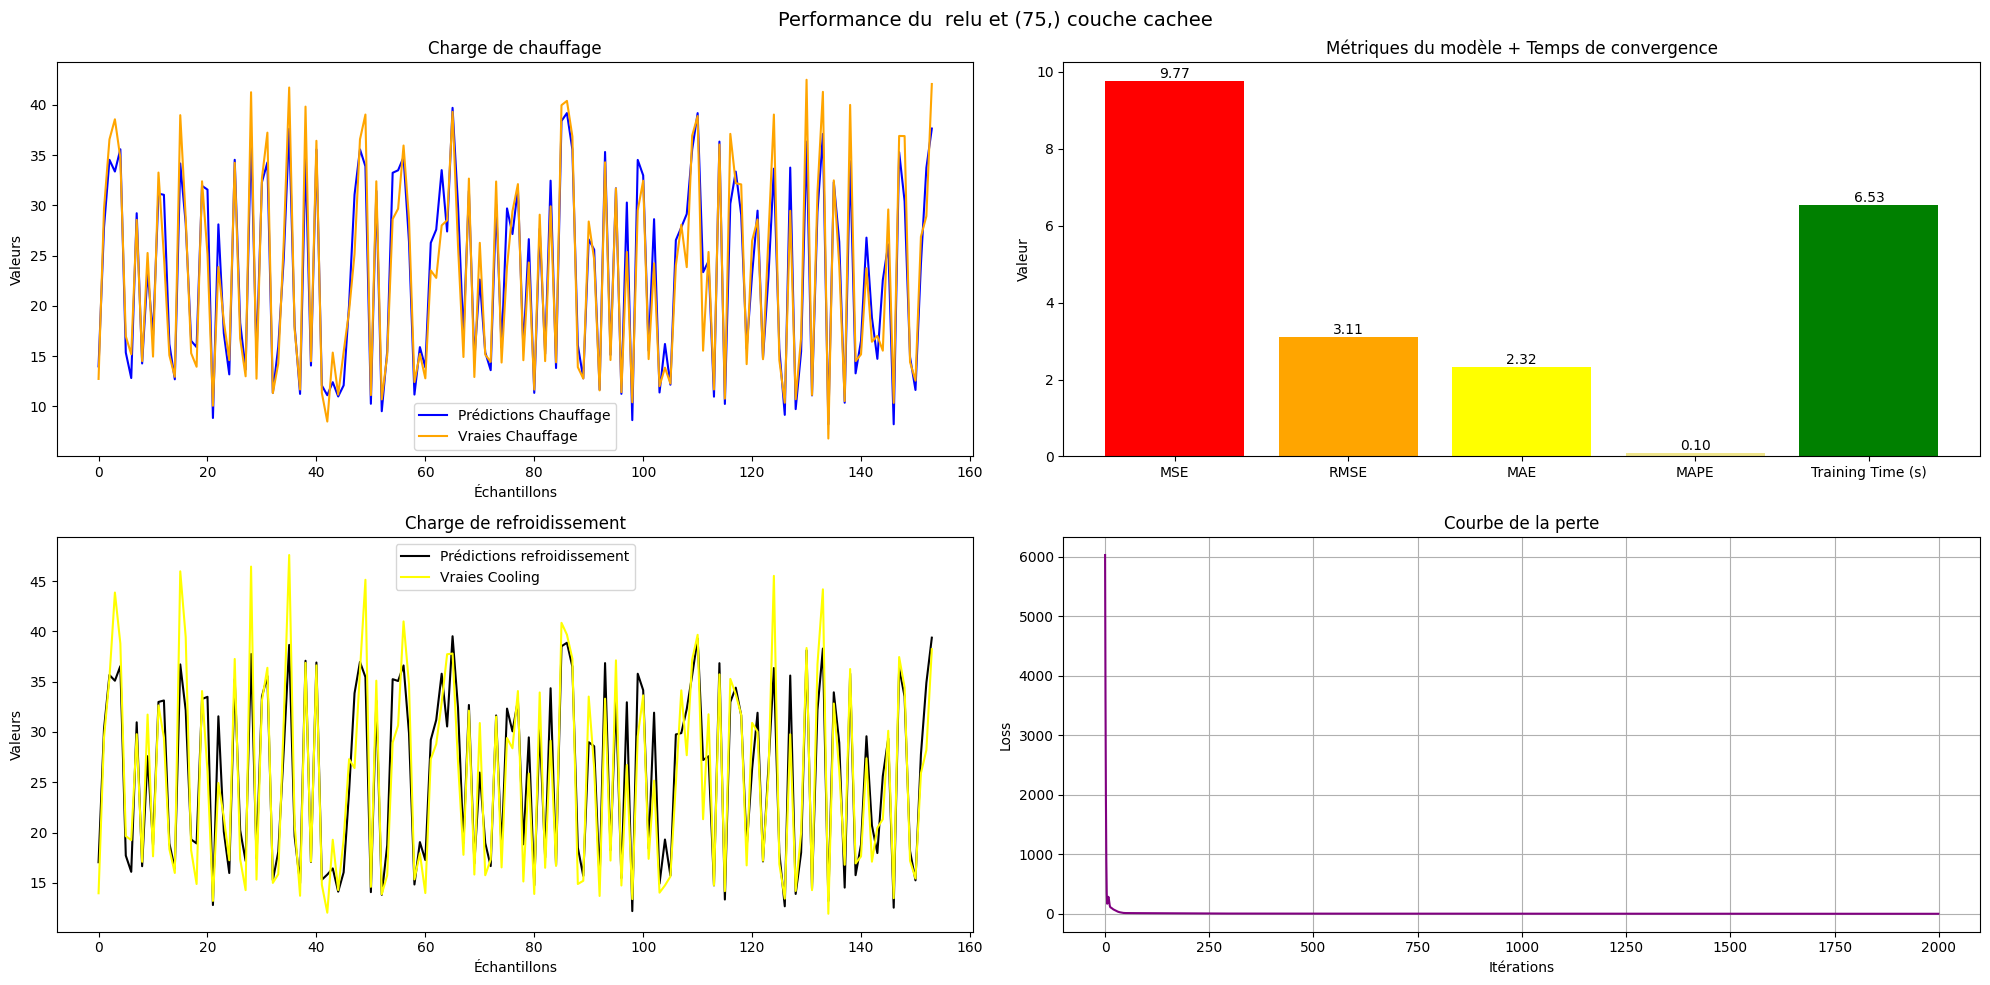

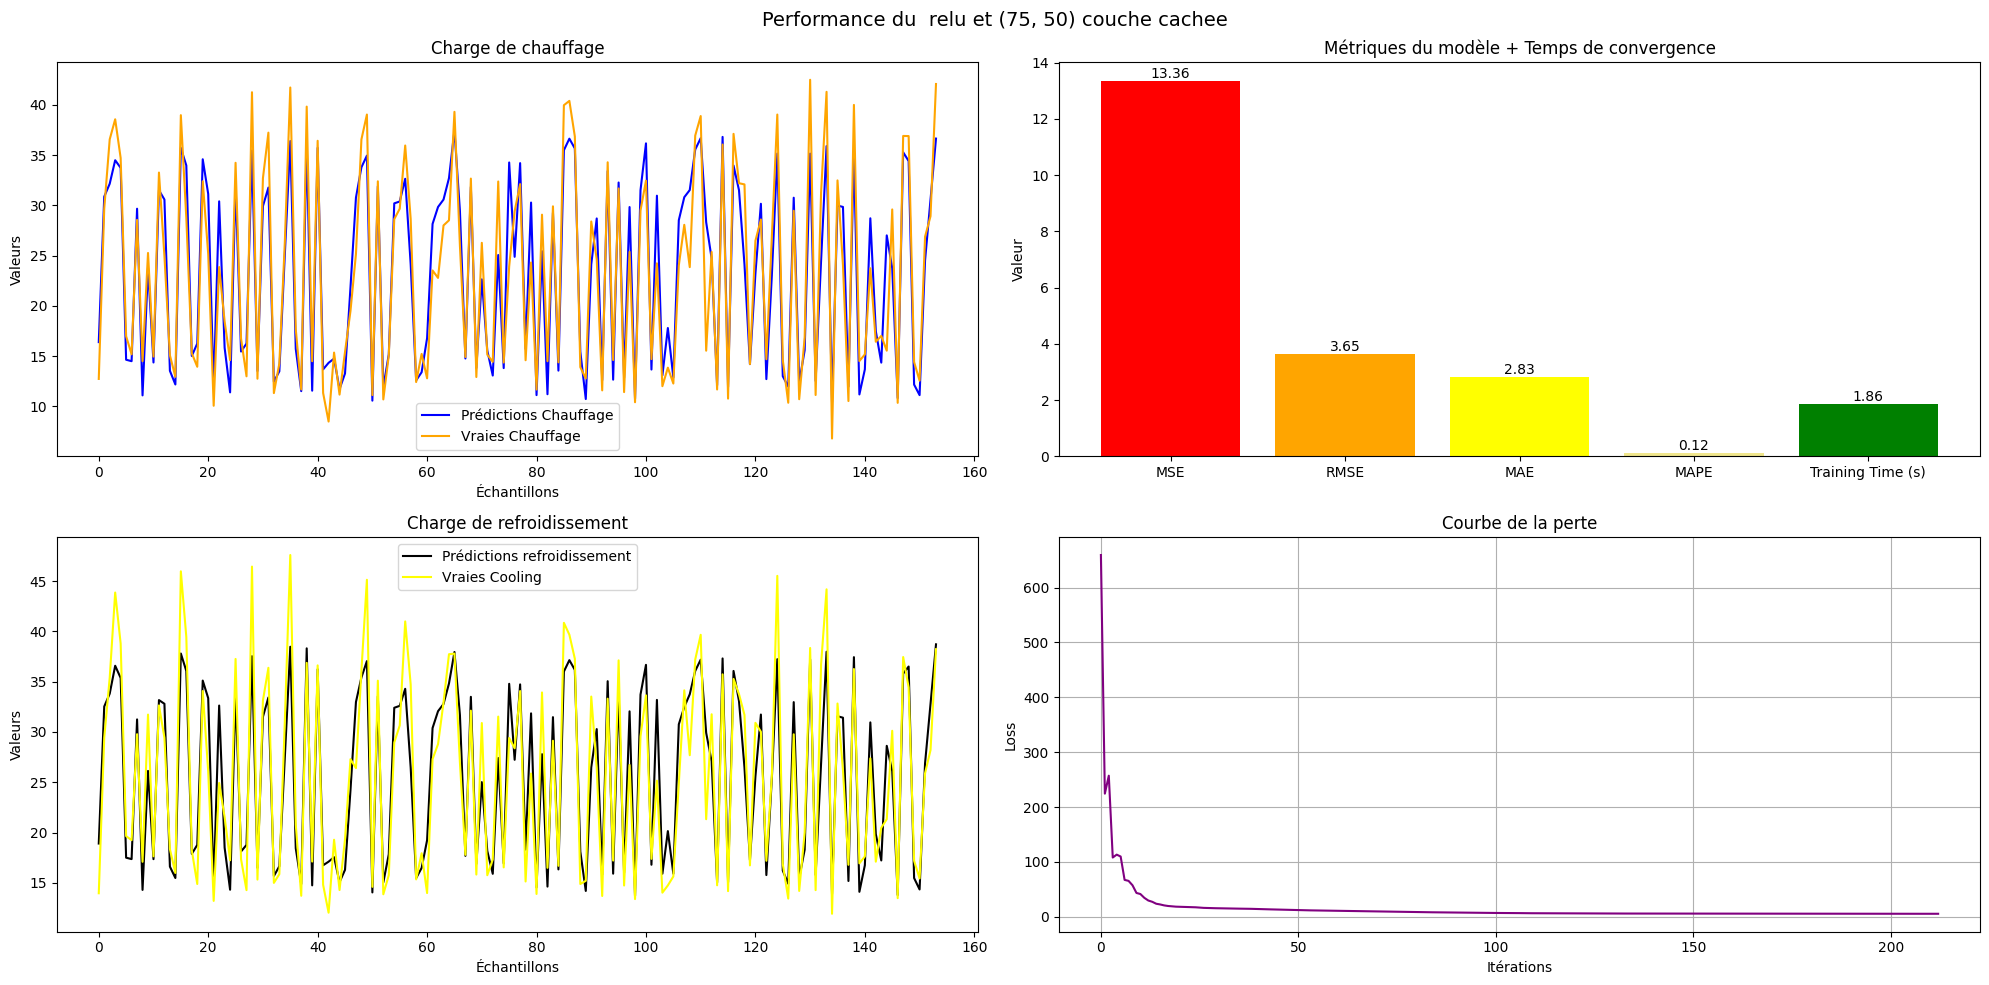

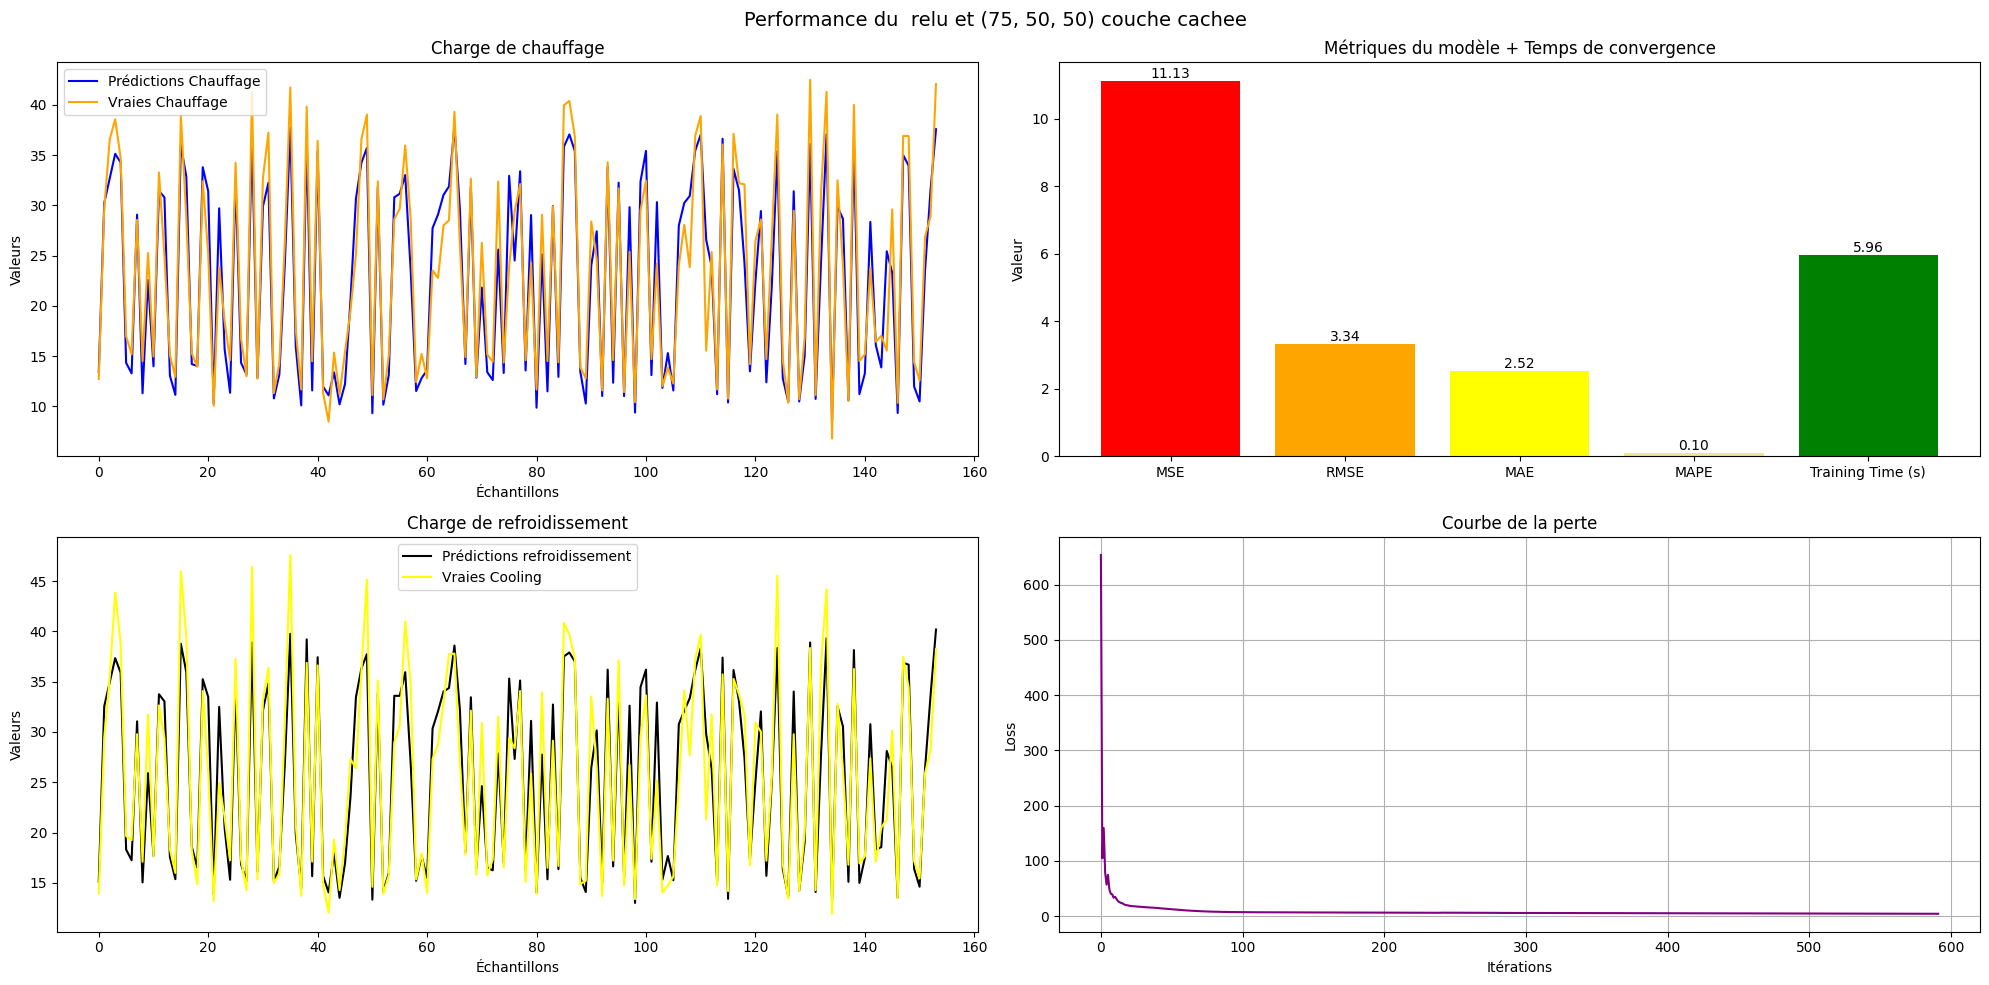

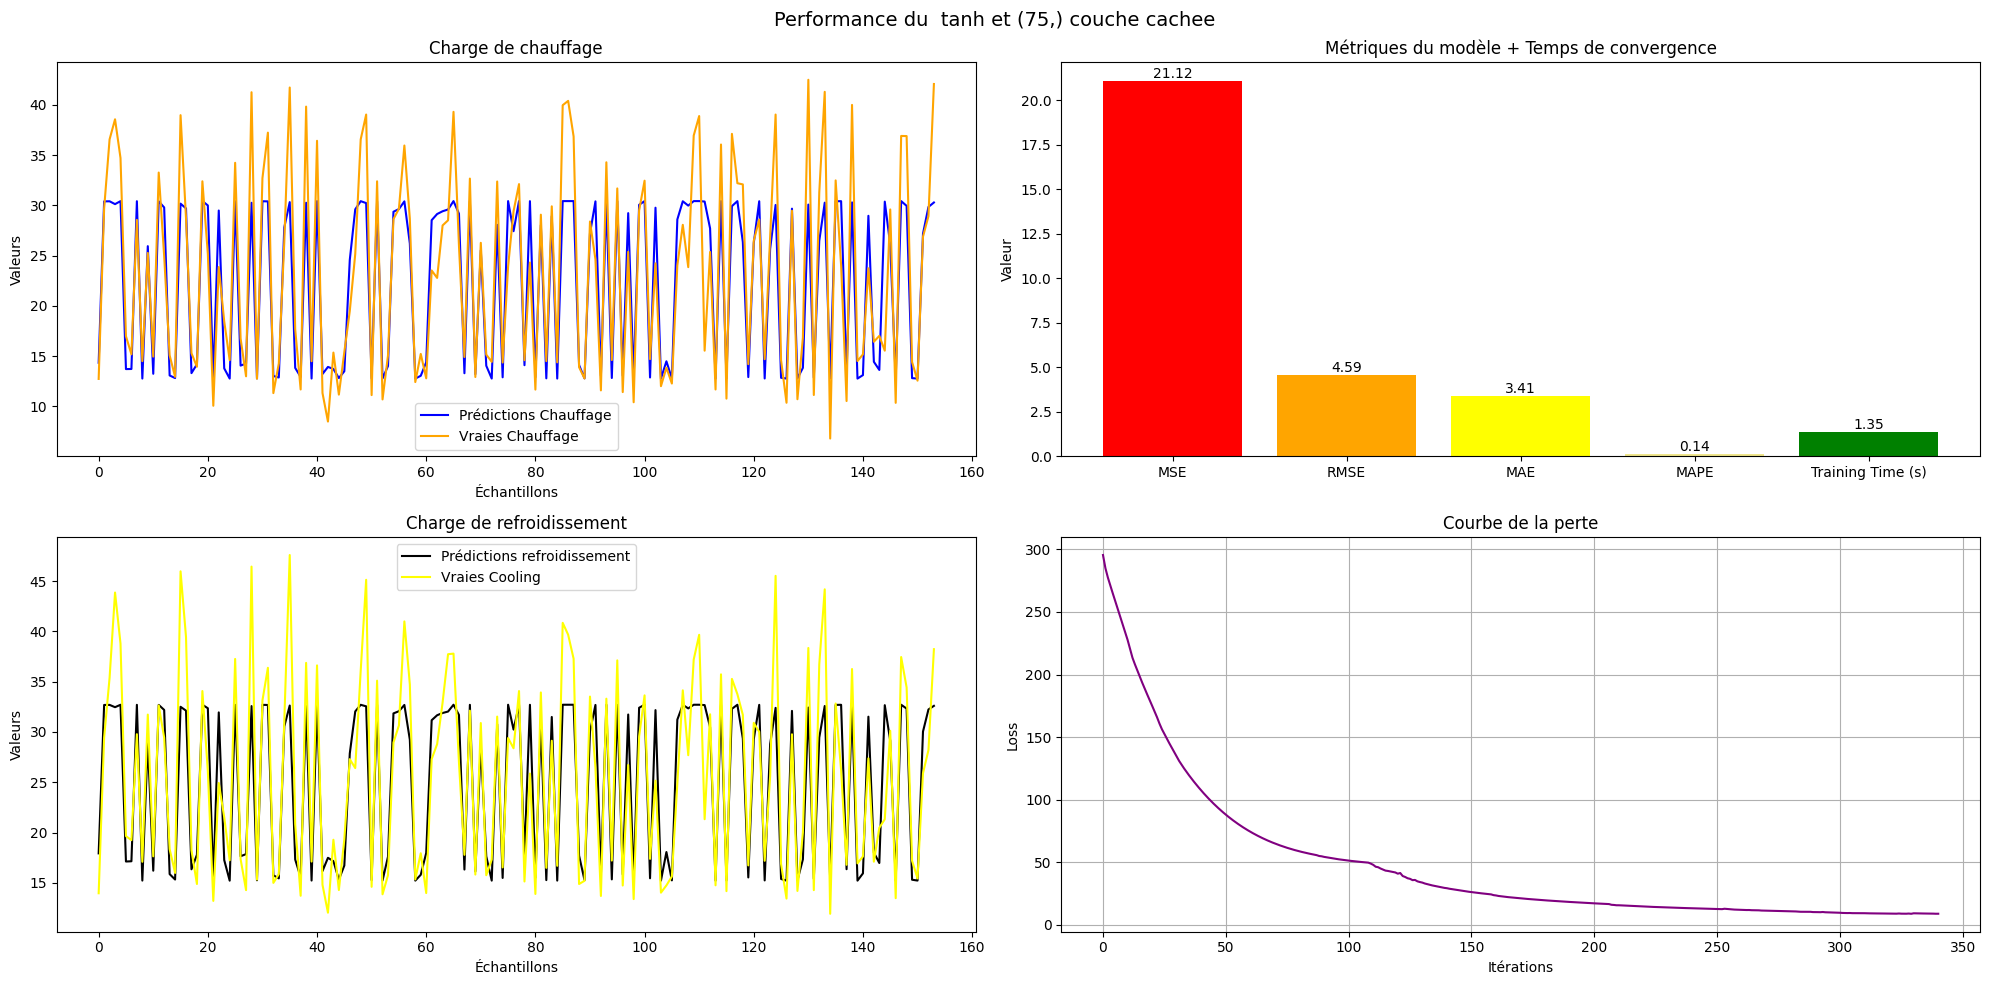

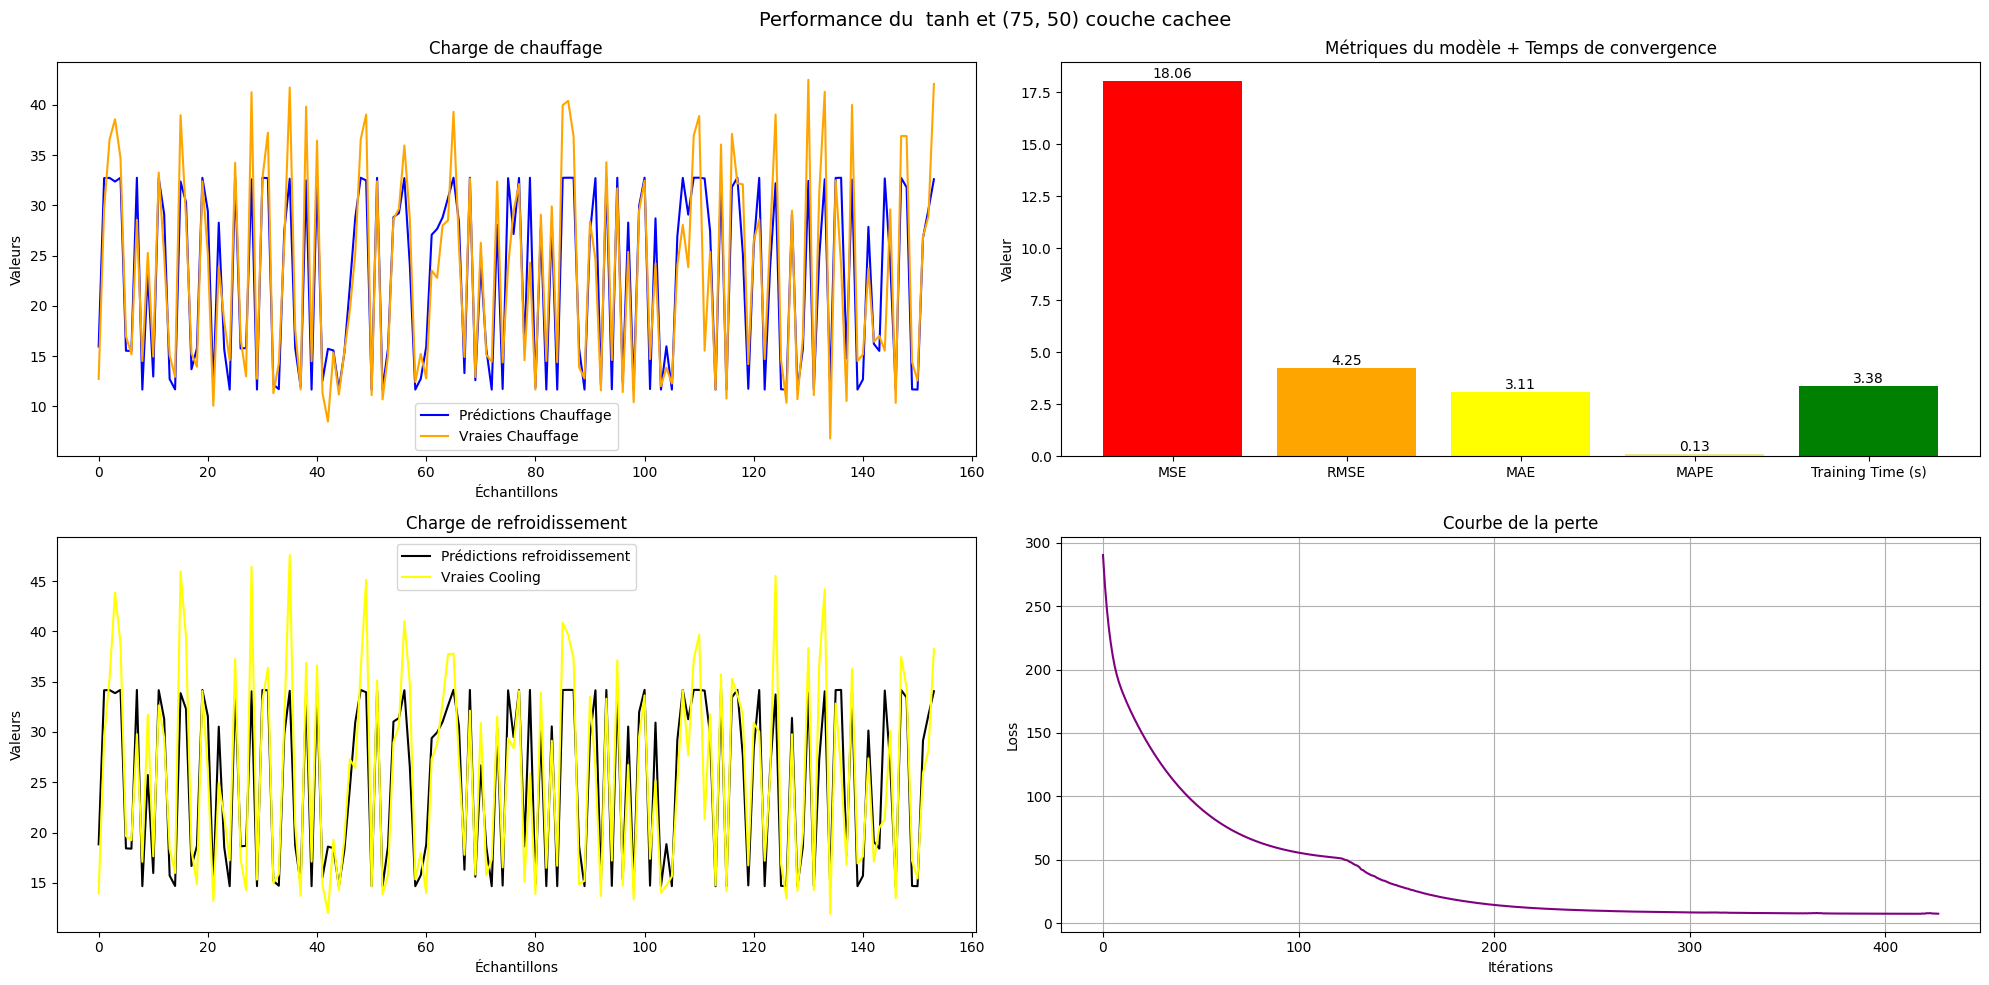

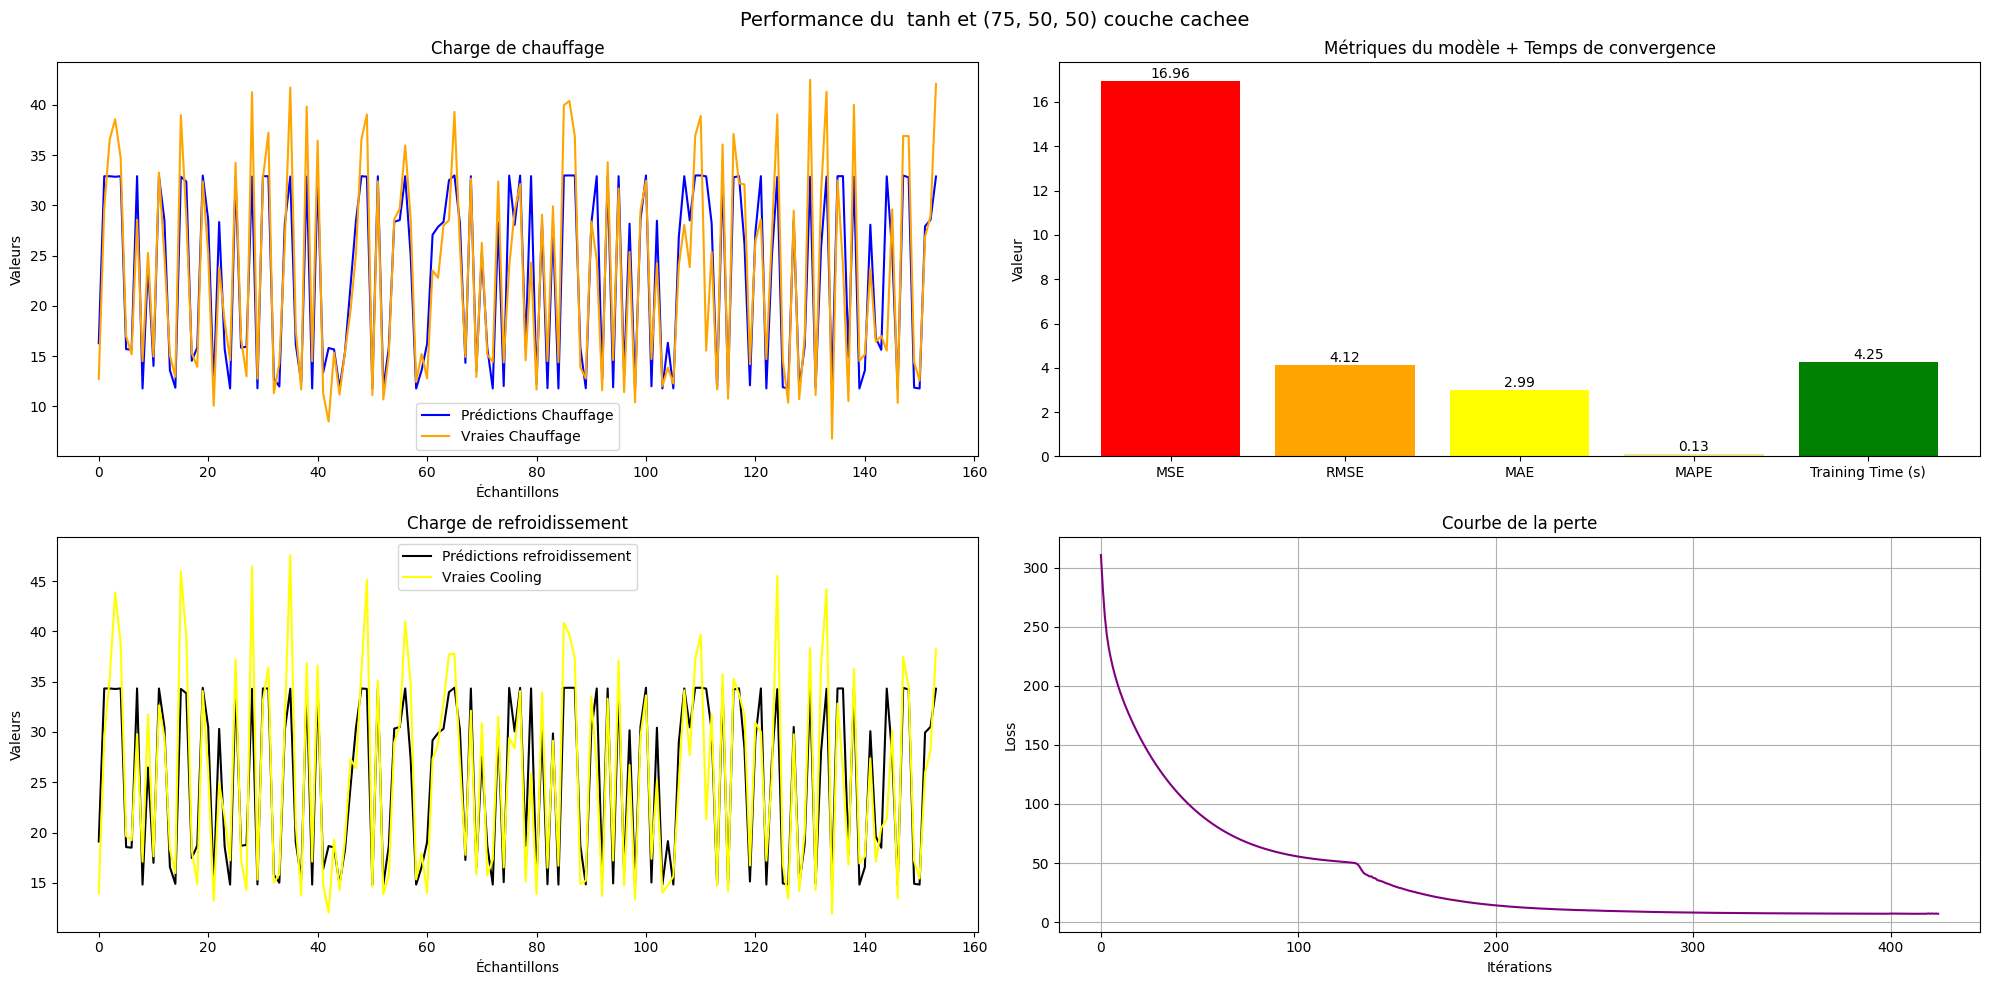

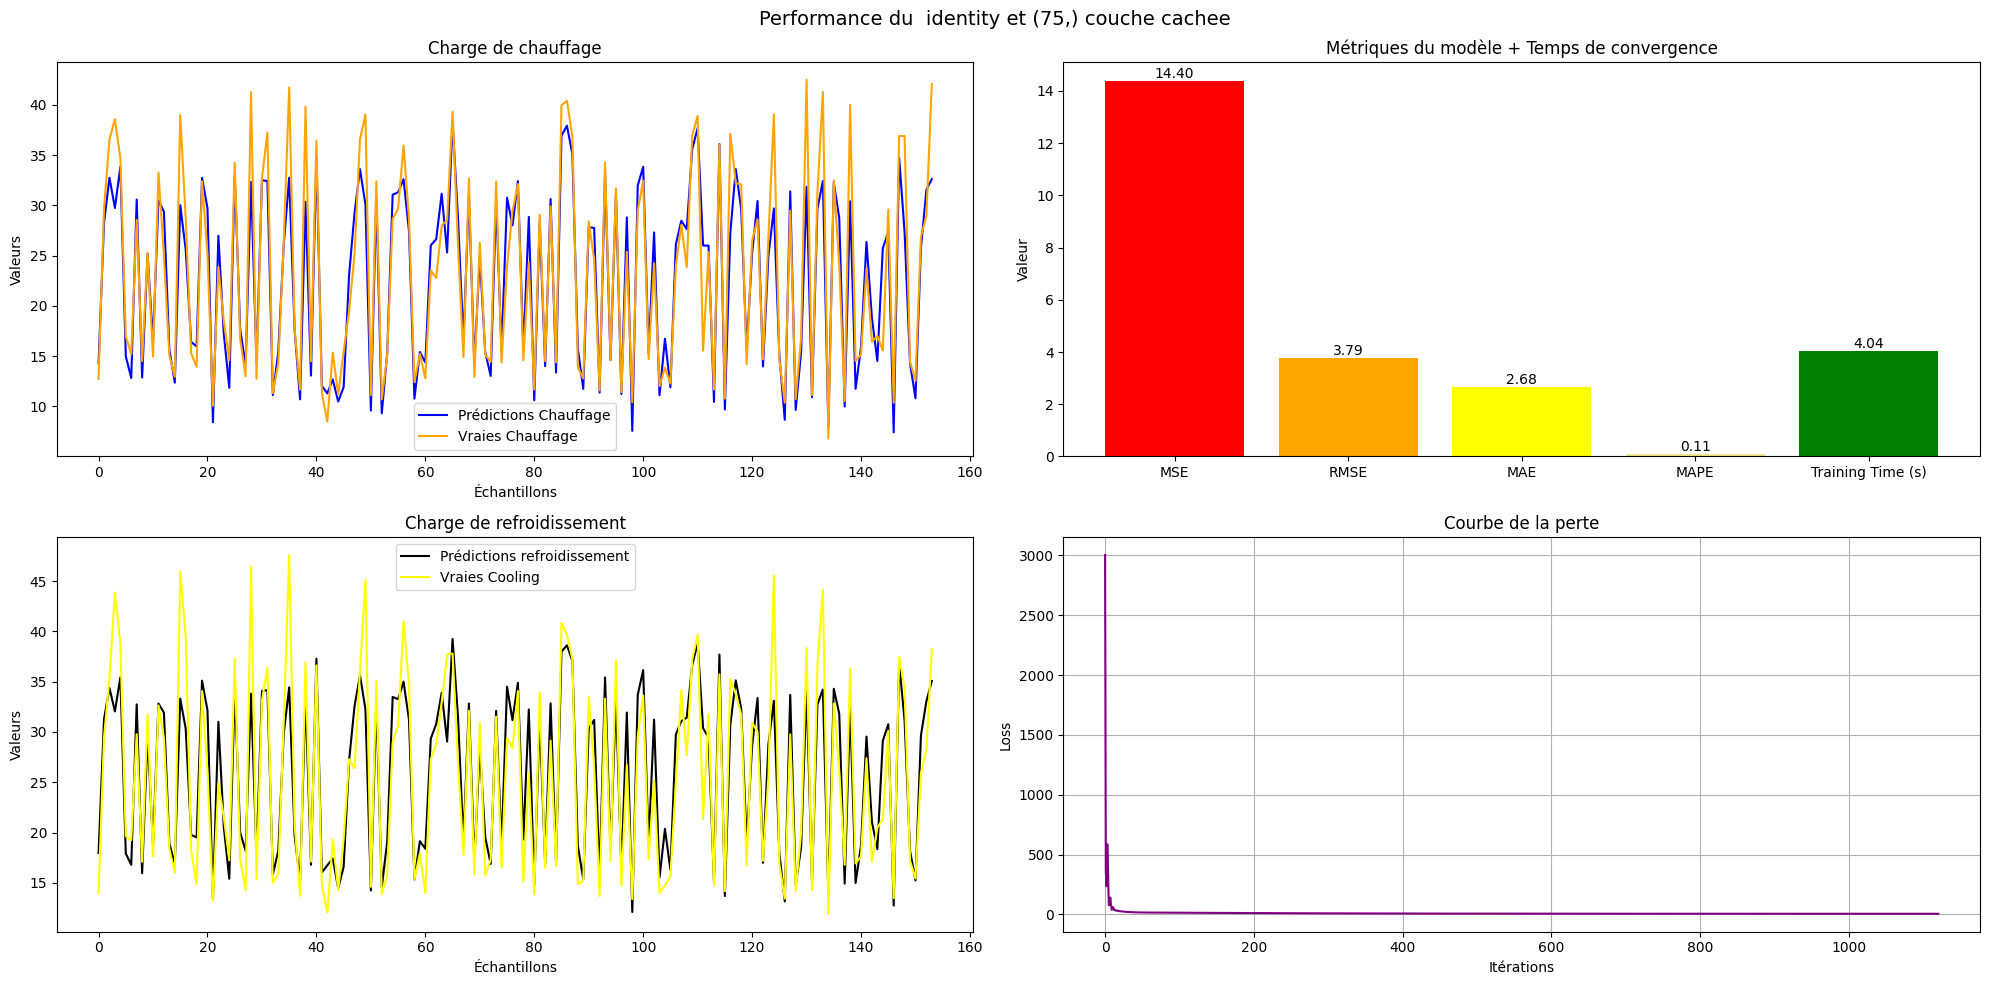

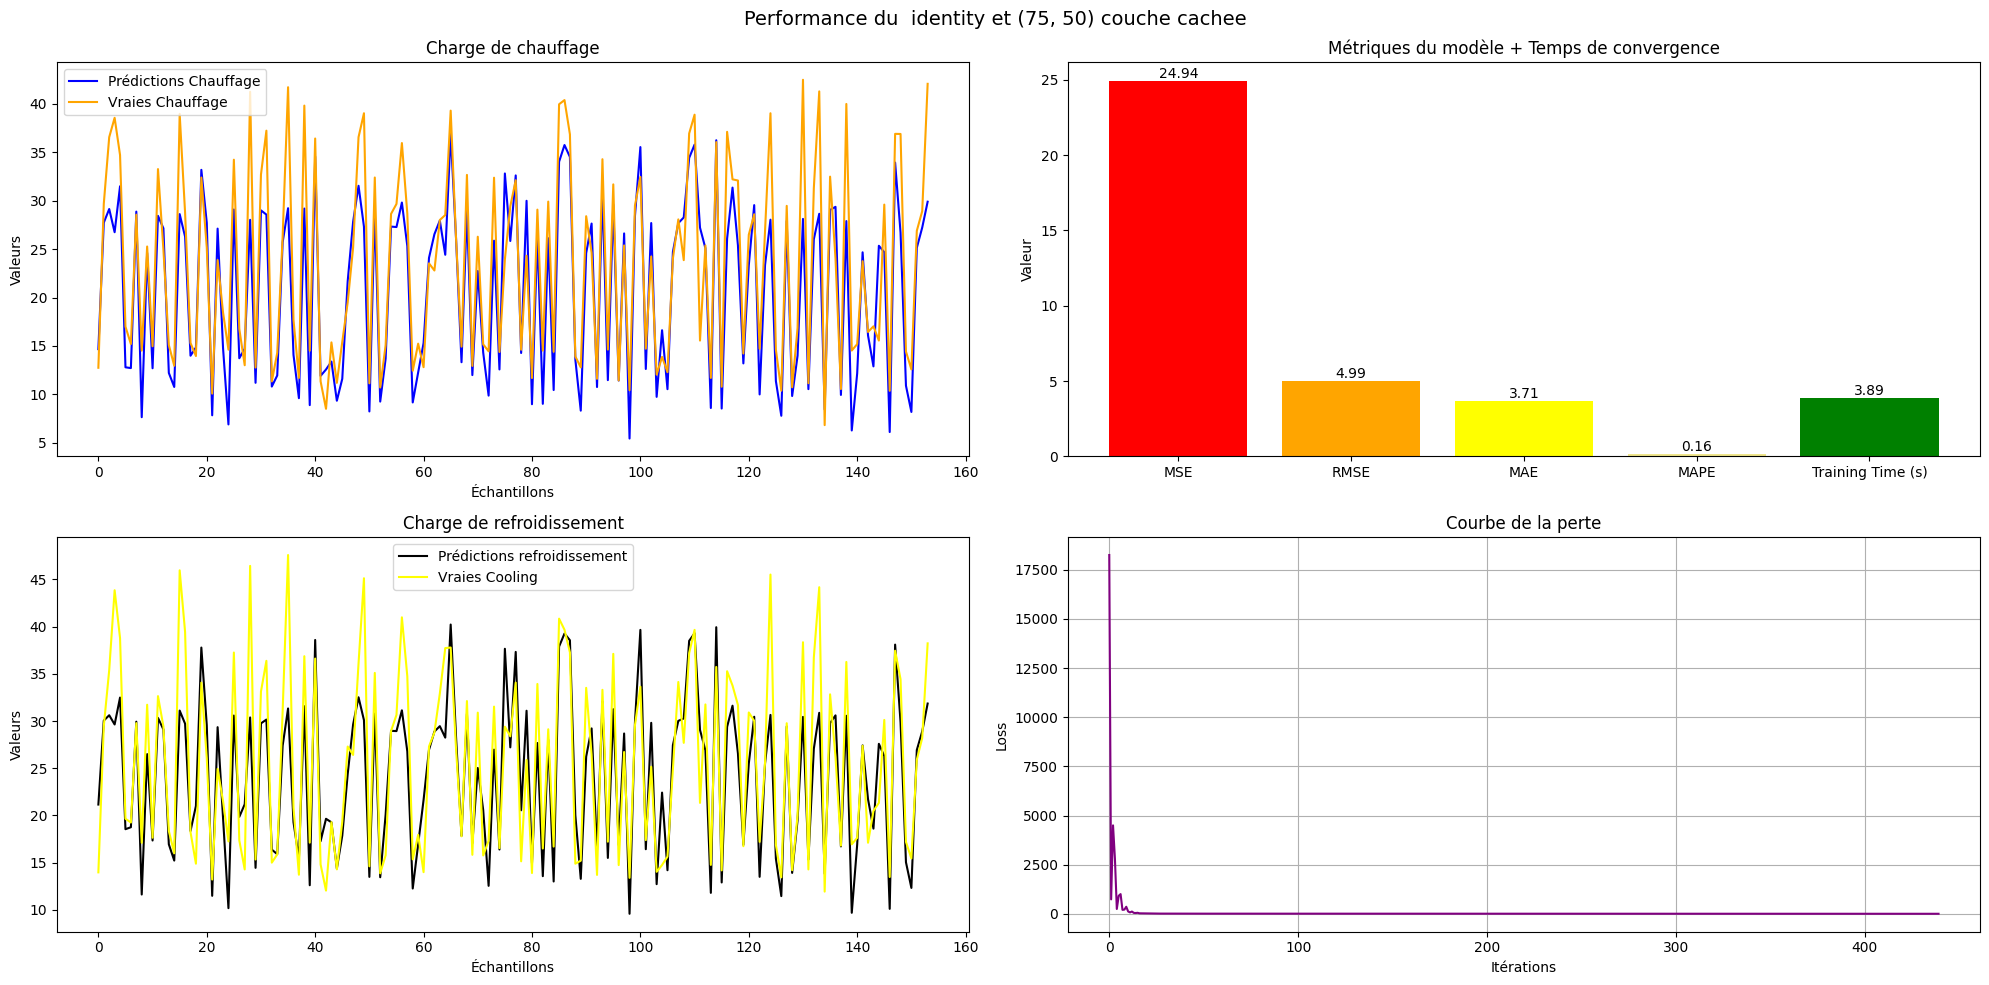

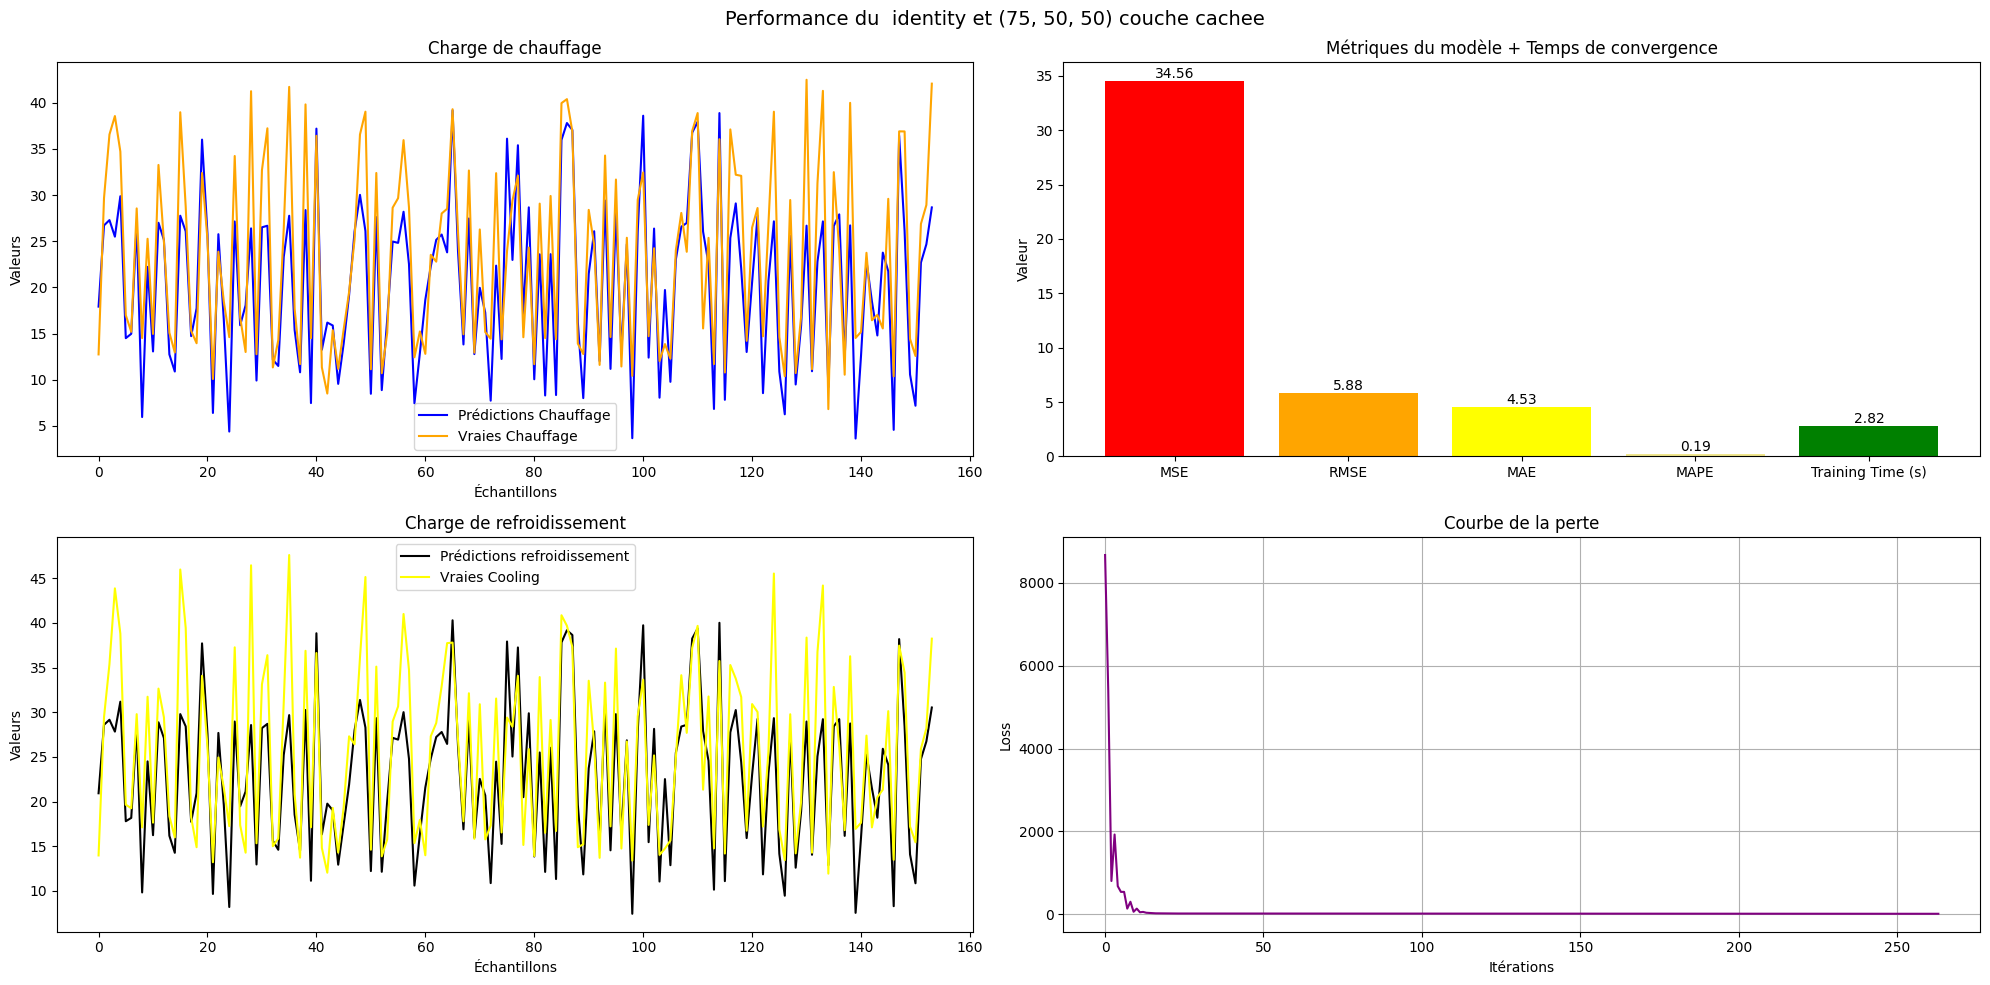

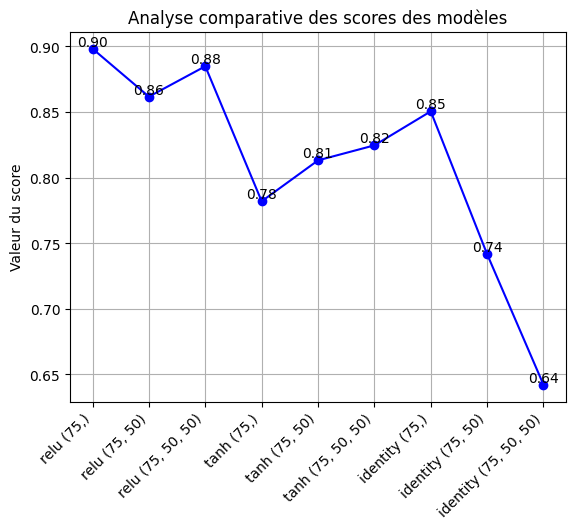

In [29]:
donnee_entrer_x = data.drop(columns=['Y1', 'Y2'])
donnee_sortie_y = data[['Y1', 'Y2']]

activation_functions = ['relu', 'tanh', 'identity']
tailles_de_couche = [(75,), (75, 50),(75, 50,50)]
# tailles_de_couche = [(75,), (75, 50), (75, 50, 25)]

models_label = []
models_scores = []

for activation in activation_functions:
    for taille in tailles_de_couche:
        model = back_propagation_model(hidden_layer_sizes=taille, donnee_entrer_x=donnee_entrer_x, donnee_sortie_y=donnee_sortie_y, activation=activation)
        model_score = model.construction_de_modele()
        model.modele_performance(model_target=f"{activation} et {taille} couche cachee")
        models_label.append(activation + " " + str(taille))
        models_scores.append(model_score)

models_de_comparaison(models_labels=models_label, models_scores=models_scores)